## 任务说明

- 任务主题：论文作者统计，统计所有论文作者出现评率Top10的姓名；
- 任务内容：论文作者的统计、使用 **Pandas** 读取数据并使用字符串操作；
- 任务成果：学习 **Pandas** 的字符串操作；

## 数据处理步骤

在原始arxiv数据集中论文作者`authors`字段是一个字符串格式，其中每个作者使用逗号进行分隔分，所以我们我们首先需要完成以下步骤：

- 使用逗号对作者进行切分；
- 剔除单个作者中非常规的字符；

具体操作可以参考以下例子：

```
C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan

# 切分为，其中\\为转义符

C. Ba'lazs
E. L. Berger
P. M. Nadolsky
C.-P. Yuan
```

当然在原始数据集中`authors_parsed`字段已经帮我们处理好了作者信息，可以直接使用该字段完成后续统计。

## 字符串处理

在Python中字符串是最常用的数据类型，可以使用引号('或")来创建字符串。Python中所有的字符都使用字符串存储，可以使用方括号来截取字符串，如下实例：

In [1]:
var1 = 'Hello Datawhale!'
var2 = "Python Everwhere!"
 
print("var1[-10:]: ", var1[-10:])
print("var2[1:5]: ", var2[0:7])

var1[-10:]:  Datawhale!
var2[1:5]:  Python 


同时在Python中还支持转义符：

| \(在行尾时) | 续行符     |
| ----------- | ---------- |
| \\          | 反斜杠符号 |
| \'          | 单引号     |
| \"          | 双引号     |
| \n          | 换行       |
| \t          | 横向制表符 |
| \r          | 回车       |

Python中还内置了很多内置函数，非常方便使用：

| **方法**            | **描述**                                                     |
| :------------------ | :----------------------------------------------------------- |
| string.capitalize() | 把字符串的第一个字符大写                                     |
| string.isalpha()    | 如果 string 至少有一个字符并且所有字符都是字母则返回 True,否则返回 False |
| string.title()      | 返回"标题化"的 string,就是说所有单词都是以大写开始，其余字母均为小写(见 istitle()) |
| string.upper()      | 转换 string 中的小写字母为大写                               |


## 具体代码实现以及讲解

### 数据读取

In [2]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [3]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', 
                     ['id', 'authors', 'categories', 'authors_parsed','update_date'])


In [4]:
data['update_date'] = pd.to_datetime(data['update_date'],format="%Y-%m-%d")
data['update_year'] = data['update_date'].dt.year
del data['update_date'] # 删除update_date字段
data

,id,authors,categories,authors_parsed,update_year
0,0704.0001,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",hep-ph,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",2008
1,0704.0002,Ileana Streinu and Louis Theran,math.CO cs.CG,"[[Streinu, Ileana, ], [Theran, Louis, ]]",2008
2,0704.0003,Hongjun Pan,physics.gen-ph,"[[Pan, Hongjun, ]]",2008
3,0704.0004,David Callan,math.CO,"[[Callan, David, ]]",2007
4,0704.0005,Wael Abu-Shammala and Alberto Torchinsky,math.CA math.FA,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]",2013
...,...,...,...,...,...
1796906,supr-con/9608008,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",supr-con cond-mat.supr-con,"[[Prozorov, R., ], [Konczykowski, M., ], [Schm...",2009
1796907,supr-con/9609001,"Durga P. Choudhury, Balam A. Willemsen, John S...",supr-con cond-mat.supr-con,"[[Choudhury, Durga P., , Physics Department, N...",2016
1796908,supr-con/9609002,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",supr-con cond-mat.supr-con,"[[Willemsen, Balam A., , Physics Department,\n...",2009
1796909,supr-con/9609003,Yasumasa Hasegawa (Himeji Institute of Technol...,supr-con cond-mat.supr-con,"[[Hasegawa, Yasumasa, , Himeji Institute of Te...",2009


In [5]:
data.shape

(1796911, 5)

In [6]:
data["update_year"].unique()

array([2008, 2007, 2013, 2015, 2009, 2010, 2014, 2011, 2012, 2016, 2019,
       2017, 2020, 2018], dtype=int64)

In [7]:
data["update_year"].value_counts()

2009    229348
2020    224505
2015    216475
2019    170618
2007    146598
2018    141724
2016    135183
2017    125311
2014     88797
2013     72525
2008     69523
2011     62168
2012     57669
2010     56467
Name: update_year, dtype: int64

为了方便处理数据，我们只选择了三个字段进行读取。

### 数据统计

接下来我们将完成以下统计操作：

- 统计所有作者姓名出现频率的Top10；
- 统计所有作者姓（姓名最后一个单词）的出现频率的Top10；
- 统计所有作者姓第一个字符的频率；

为了节约计算时间，下面选择部分类别下的论文进行处理：

In [8]:
# 选择类别为cs.CV下面的论文
data2 = data[data['categories'].apply(lambda x: 'cs.CV' in x)]

# 拼接所有作者
all_authors = sum(data2['authors_parsed'], [])

这里sum的用法：将嵌套列表中的子元素合并，并赋值给一个空列表[]  
sum(iterable,[,start])  
sum函数的参数包括两个（iterable可迭代对象，start求和的初始值），sum会把可迭代对象内的元素加在start参数传入的初始值上。

In [9]:
a = [[['a','b','c'],
      ['aa','bb','cc']],
     [['a2','b2','c2'],
      ['aa2','bb2','cc2']]]
a = pd.Series(a)
print(a)
print(sum(a,[])) 
#相当于计算 [] + [['a', 'b', 'c'], ['aa', 'bb', 'cc']] + [['a2', 'b2', 'c2'], ['aa2', 'bb2', 'cc2']]

0          [[a, b, c], [aa, bb, cc]]
1    [[a2, b2, c2], [aa2, bb2, cc2]]
dtype: object
[['a', 'b', 'c'], ['aa', 'bb', 'cc'], ['a2', 'b2', 'c2'], ['aa2', 'bb2', 'cc2']]


处理完成后`all_authors`变成了所有一个list，其中每个元素为一个作者的姓名。我们首先来完成姓名频率的统计。

In [10]:
# 拼接所有的作者
authors_names = [' '.join(x) for x in all_authors]
authors_names = pd.DataFrame(authors_names,columns=['authors_names'])

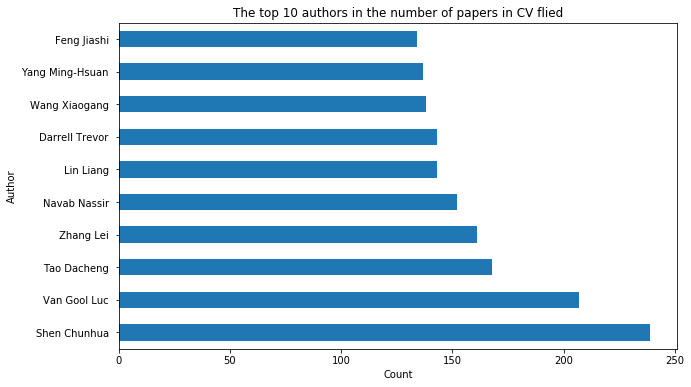

In [17]:
# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
authors_names['authors_names'].value_counts().head(10).plot(kind='barh')
# 修改图配置
#names = authors_names['authors_names'].value_counts().index.values[:10]
#_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')
plt.title("The top 10 authors in the number of papers in CV flied")
plt.show()

接下来统计姓名姓，也就是`authors_parsed`字段中作者第一个单词：

Text(0.5, 1.0, 'The top 10 last names in the number of papers in CV flied')

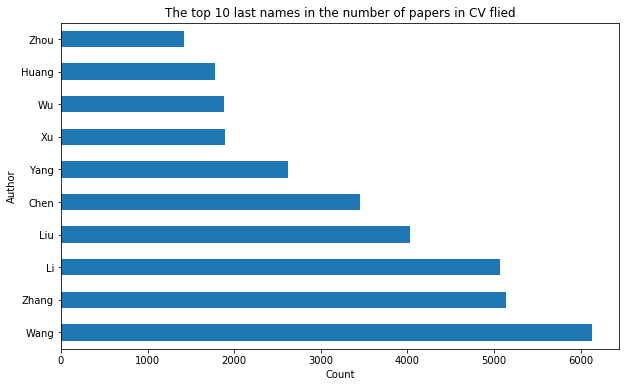

In [12]:
authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)

plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

#names = authors_lastnames[0].value_counts().index.values[:10]
#_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')
plt.title("The top 10 last names in the number of papers in CV flied")

绘制得到的结果，从结果看出这些都是华人或者中国姓氏~


统计所有作者姓第一个字符的评率，这个流程与上述的类似，同学们可以自行尝试。


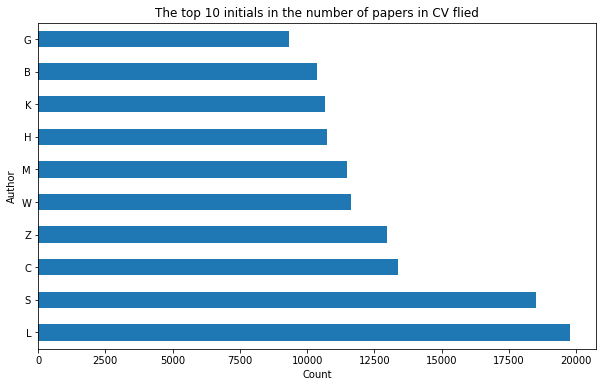

In [16]:
authors_initials = [x[0][0] for x in all_authors] # 取字符串x[0]的第一个字符，即x[0][0]
authors_initials = pd.DataFrame(authors_initials)

plt.figure(figsize=(10, 6))
authors_initials[0].value_counts().head(10).plot(kind='barh')

#names = authors_lastnames[0].value_counts().index.values[:10]
#_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')
plt.title("The top 10 initials in the number of papers in CV flied")
plt.show()

In [14]:
# 按年份统计每年cv论文数量
data_cv_year = data2.groupby("update_year").agg({"id":"count"}).reset_index().rename(columns={"id":"counts"})
data_cv_year

,update_year,counts
0,2007,184
1,2008,63
2,2009,127
3,2010,253
4,2011,292
5,2012,468
6,2013,711
7,2014,1089
8,2015,1999
9,2016,3334


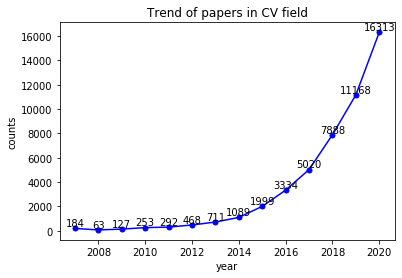

In [15]:
plt.plot(data_cv_year["update_year"],data_cv_year["counts"],"b", marker='.', ms=10)
plt.xlabel("year")
plt.ylabel("counts")
plt.title("Trend of papers in CV field")
#设置数据标签
for x1, y1 in zip(data_cv_year["update_year"],data_cv_year["counts"]):
    plt.text(x1, y1 + 1, str(y1), ha='center', va='bottom', fontsize=10, rotation=0)